<a href="https://colab.research.google.com/github/AxlAmatov/fastapi-websocket-broadcast/blob/master/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BA_%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%BC%D1%83_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D1%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1
Загрузите файл HR.csv в pandas dataframe

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('/content/drive/MyDrive/data/HR.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# Задание 2
Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [6]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000




# Задание 3

Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.


In [111]:
from plotly import figure_factory as ff

corr_df = df[
    [
        'satisfaction_level',
        'last_evaluation',
        'number_project',
        'average_montly_hours',
        'time_spend_company',
        'left',
        'Work_accident',
        'promotion_last_5years'
    ]
].corr()

fig = ff.create_annotated_heatmap(
    z=corr_df.values, x=list(corr_df.index),
    y=list(corr_df.columns),
    annotation_text=corr_df.round(3).values,
    showscale=True
)
fig['layout'].update(width=800, height=500, autosize=False)
fig.show()



Наиболее скоррелированные переменные:

    average_montly_hours и number_project (0,417)

Наименее скоррелированные переменные:

    left и satisfaction_level (-0,388)



#Задание 4

Рассчитайте сколько сотрудников работает в каждом департаменте.


In [41]:
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

По размеру штата отдел продаж лидирует с большим отрывом.


# Задание 5

Показать распределение сотрудников по зарплатам.


<Axes: xlabel='salary'>

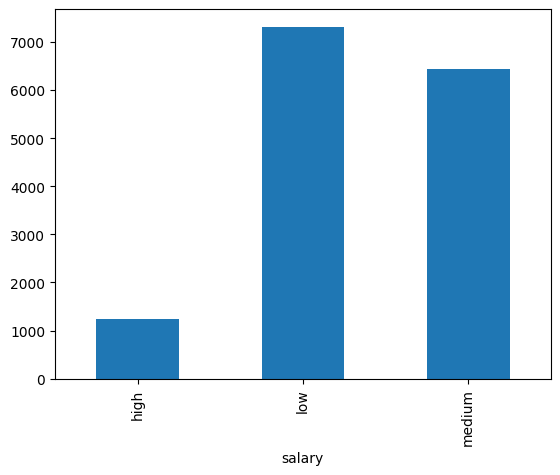

In [45]:
df.groupby('salary')['salary'].count().plot(kind="bar")

# Задание 6

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности


In [71]:
df_salary = df.pivot_table(index='department', columns='salary', aggfunc='size')
df_salary

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<Axes: xlabel='department'>

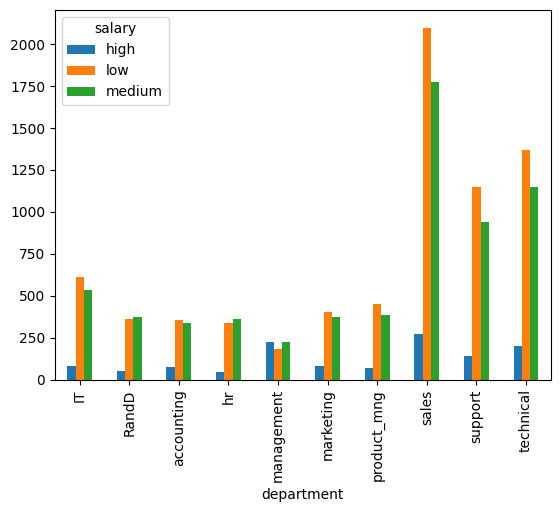

In [67]:
df_salary.plot(kind="bar")

Менеджмент отличается доходами: при штате в 630 человек 225 (36%) имеют высокую зарплату.


# Задание 7

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


In [75]:
low_salary_df = list(df.loc[df['salary'] == 'low']['average_montly_hours'])
high_salary_df = list(df.loc[df['salary'] == 'high']['average_montly_hours'])

result = stats.ttest_ind(low_salary_df, high_salary_df)

if (result.pvalue < 0.05):
    print('Гепотеза верна')
else:
    print('Гепотеза не верна')

Гепотеза не верна



# Задание 8

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов








In [86]:

dismissed =  df[(df['left'] == 1)]
non_dismissed = df[(df['left'] == 0)]

data = [
    {
    'Кретерий': 'Доля сотрудников с повышением за последние 5 лет',
    'Уволенные': round(
        dismissed.promotion_last_5years.value_counts(normalize=True)[1], 3
    ),
    'Не уволенные': round(
        non_dismissed.promotion_last_5years.value_counts(normalize=True)[1], 3
    )
    },
    {
    'Кретерий': 'Средняя степень удовлетворенности',
    'Уволенные': round(dismissed.satisfaction_level.mean(), 3),
    'Не уволенные': round(non_dismissed.satisfaction_level.mean(), 3)
    },
    {
    'Кретерий': 'Среднее количество проектов',
    'Уволенные': round(dismissed.number_project.mean(), 3),
    'Не уволенные': round(non_dismissed.number_project.mean(), 3)
    }
]

pd.DataFrame(data)

,Кретерий,Уволенные,Не уволенные
0,Доля сотрудников с повышением за последние 5 лет,0.005,0.026
1,Средняя степень удовлетворенности,0.440,0.667
2,Среднее количество проектов,3.856,3.787




# Задание 9

Разделить данные на тестовую и обучающую выборки

Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

Оценить качество модели на тестовой выборки


In [149]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# satisfaction_level 	last_evaluation 	number_project 	average_montly_hours 	time_spend_company 	Work_accident 	left 	promotion_last_5years 	department 	salary
X = df[[
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
]]
y = df['left']
left = pd.array( df['left'])

X_train, X_test, y_train, y_test = train_test_split(X, left, test_size=0.20)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

pd.DataFrame([y_test, lda.predict(X_test)]).T



,0,1
0,1,1
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [150]:
lda.score(X_test, y_test).round(2)

0.77

In [151]:
accuracy_score(y_test, lda.predict(X_test))

0.7656666666666667

Точность модели менее 80%. Значит прогноз увольнения по шести применяемым показателям будет недостоверным.

